### House Pricing prediction

##### File descriptions
######  - train.csv - 예측 모델을 만들기 위해 사용하는 학습 데이터입니다. 집의 정보와 예측할 변수인 가격(Price) 변수를 가지고 있습니다.
######  - test.csv - 학습셋으로 만든 모델을 가지고 예측할 가격(Price) 변수를 제외한 집의 정보가 담긴 테스트 데이터 입니다.
######  - sample_submission.csv - 제출시 사용할 수 있는 예시 submission.csv 파일입니다.

##### Data fields
###### - ID : 집을 구분하는 번호
###### - date : 집을 구매한 날짜
###### - price : 집의 가격(Target variable)
###### - bedrooms : 침실의 수
###### - bathrooms : 화장실의 수
###### - sqft_living : 주거 공간의 평방 피트(면적)
###### - sqft_lot : 부지의 평방 피트(면적)
###### - floors : 집의 층 수
###### - waterfront : 집의 전방에 강이 흐르는지 유무 (a.k.a. 리버뷰)
###### - view : 집이 얼마나 좋아 보이는지의 정도
###### - condition : 집의 전반적인 상태
###### - grade : King County grading 시스템 기준으로 매긴 집의 등급
###### - sqft_above : 지하실을 제외한 평방 피트(면적)
###### - sqft_basement : 지하실의 평방 피트(면적)
###### - yr_built : 지어진 년도
###### - yr_renovated : 집을 재건축한 년도
###### - zipcode : 우편번호
###### - lat : 위도
###### - long : 경도
###### - sqft_living15 : 2015년 기준 주거 공간의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)
###### - sqft_lot15 : 2015년 기준 부지의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)


### 1. Explore Data Analysis

In [1]:
# library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn library
from sklearn.preprocessing import StandardScaler

# Shapely for converting latitude/longtitude to geometry
from shapely.geometry import Point 
# To create GeodataFrame
import geopandas as gpd 


# ignore warning message
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# brint train data
df_train = pd.read_csv("/Users/heewonchoi/Downloads/2019-2nd-ml-month-with-kakr/train.csv")
df_test = pd.read_csv("/Users/heewonchoi/Downloads/2019-2nd-ml-month-with-kakr/test.csv")

In [3]:
df_train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [4]:
# we check the columns
df_train.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
# dimension & records check
df_train.shape

(15035, 21)

In [6]:
# null value check
df_train.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
# data summary
df_train.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,15035.000000,1.503500e+04,15035.000000,15035.000000,15035.000000,1.503500e+04,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000
mean,7517.000000,5.406827e+05,3.369139,2.115065,2083.790223,1.529697e+04,1.498071,0.007117,0.234253,3.406651,7.660725,1794.158164,289.632059,1971.100432,83.798936,98078.031726,47.560721,-122.213677,1992.754772,12823.884935
std,4340.374984,3.715247e+05,0.902721,0.767519,922.134087,4.261282e+04,0.538522,0.084063,0.763376,0.646505,1.179803,831.738609,440.663284,29.407612,400.398498,53.297815,0.138164,0.141294,691.456442,27736.259787
min,0.000000,7.800000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3758.500000,3.220000e+05,3.000000,1.750000,1430.000000,5.027500e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.472700,-122.328000,1490.000000,5100.000000
50%,7517.000000,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1570.000000,0.000000,1975.000000,0.000000,98065.000000,47.571900,-122.231000,1850.000000,7610.000000
75%,11275.500000,6.450000e+05,4.000000,2.500000,2560.000000,1.069550e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2230.000000,550.000000,1997.000000,0.000000,98117.000000,47.678300,-122.126000,2360.000000,10076.000000
max,15034.000000,7.700000e+06,10.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4130.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
# Date 시계열 순서로 정렬하기
df_train.sort_values(by=['date','grade'], axis=0)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
4701,4701,20140502T000000,275000.0,3,1.50,1180,10277,1.0,0,0,...,6,1180,0,1983,0,98045,47.4880,-121.787,1680,11104
11101,11101,20140502T000000,235000.0,2,1.00,1210,9400,1.0,0,0,...,6,1210,0,1949,0,98106,47.5342,-122.360,1580,6026
114,114,20140502T000000,313000.0,3,1.50,1340,7912,1.5,0,0,...,7,1340,0,1955,0,98133,47.7658,-122.339,1480,7940
754,754,20140502T000000,550000.0,4,2.50,1940,10500,1.0,0,0,...,7,1140,800,1976,0,98052,47.6830,-122.114,2200,10500
1007,1007,20140502T000000,490000.0,2,1.00,880,6380,1.0,0,0,...,7,880,0,1938,1994,98115,47.6924,-122.322,1340,6380
2374,2374,20140502T000000,452500.0,3,2.50,2430,88426,1.0,0,0,...,7,1570,860,1985,0,98045,47.4828,-121.718,1560,56827
2648,2648,20140502T000000,463000.0,3,1.75,1710,7320,1.0,0,0,...,7,1710,0,1948,0,98155,47.7512,-122.281,2260,8839
3554,3554,20140502T000000,365000.0,3,1.00,1090,6435,1.0,0,0,...,7,1090,0,1955,0,98106,47.5334,-122.365,1340,6435
4002,4002,20140502T000000,419000.0,3,1.50,1570,6700,1.0,0,0,...,7,1570,0,1956,0,98007,47.6022,-122.134,1570,7300
4535,4535,20140502T000000,257950.0,3,1.75,1370,5858,1.0,0,0,...,7,1370,0,1987,0,98198,47.3815,-122.313,1400,7500


In [33]:
# 날짜에 대한 정리
df_train.groupby('date').size()

date
20140502T000000    46
20140503T000000     3
20140504T000000     3
20140505T000000    62
20140506T000000    59
20140507T000000    66
20140508T000000    53
20140509T000000    60
20140510T000000     3
20140511T000000     2
20140512T000000    57
20140513T000000    53
20140514T000000    50
20140515T000000    55
20140516T000000    53
20140517T000000     1
20140518T000000     3
20140519T000000    64
20140520T000000    87
20140521T000000    66
20140522T000000    67
20140523T000000    54
20140524T000000     6
20140525T000000     2
20140526T000000     7
20140527T000000    82
20140528T000000    82
20140529T000000    54
20140530T000000    50
20140531T000000     2
                   ..
20150415T000000    51
20150416T000000    54
20150417T000000    57
20150418T000000     4
20150419T000000     1
20150420T000000    56
20150421T000000    77
20150422T000000    84
20150423T000000    77
20150424T000000    66
20150425T000000    12
20150426T000000     7
20150427T000000    91
20150428T000000    77
20150

In [9]:
# 집앞에 강이 흐르는가?
df_train.groupby('waterfront').size()

waterfront
0    14928
1      107
dtype: int64

In [10]:
df_water_0 = df_train.query('waterfront == 0')
df_water_1 = df_train.query('waterfront == 1')

In [11]:
# 집의 층수
df_train.groupby('floors').size()

floors
1.0    7361
1.5    1330
2.0    5810
2.5     113
3.0     417
3.5       4
dtype: int64

In [12]:
# 집의 등급
df_train.groupby('grade').size() 

grade
1        1
3        2
4       23
5      174
6     1406
7     6228
8     4207
9     1855
10     781
11     288
12      61
13       9
dtype: int64

In [13]:
# 방 갯수
df_train.groupby('bedrooms').size()

bedrooms
0        4
1      133
2     1931
3     6835
4     4797
5     1108
6      188
7       22
8       10
9        5
10       2
dtype: int64

In [14]:
# 건물 연식
df_train.groupby('yr_built').size().tail()

yr_built
2011     97
2012    122
2013    137
2014    405
2015     28
dtype: int64

In [15]:
# 집의 상태
df_train.groupby('condition').size()

condition
1      21
2     110
3    9793
4    3956
5    1155
dtype: int64

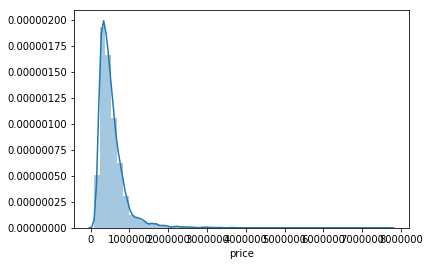

In [16]:
sns.distplot(df_train['price']);

In [17]:
print("Skewness: %f" % df_train['price'].skew())
print("Kurtosis: %f" % df_train['price'].kurt())

Skewness: 4.290252
Kurtosis: 40.154919


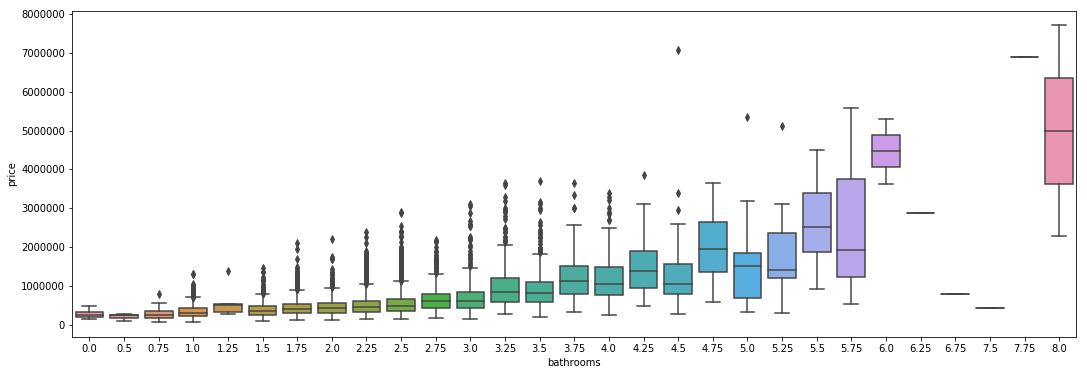

In [18]:
# boxplot으로 이상치 확인하기
# 화장실 갯수별, 가격 알아보기
data = pd.concat([df_train['price'], df_train['bathrooms']], axis=1)
f, ax = plt.subplots(figsize=(18, 6))
fig = sns.boxplot(x='bathrooms', y="price", data=data)

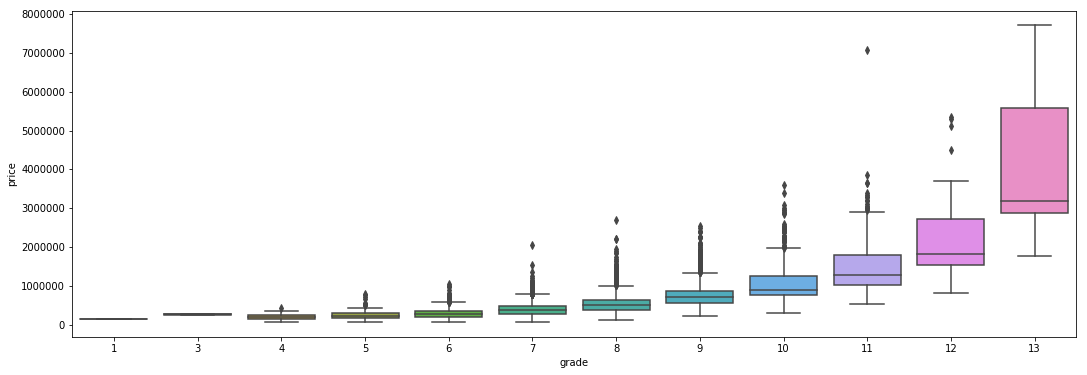

In [19]:
# grade, 가격 알아보기
data = pd.concat([df_train['price'], df_train['grade']], axis=1)
f, ax = plt.subplots(figsize=(18, 6))
fig = sns.boxplot(x='grade', y="price", data=data)

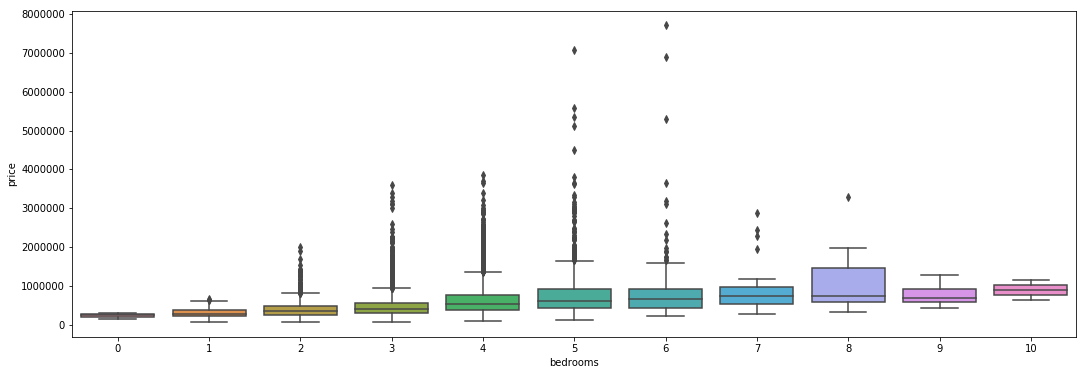

In [20]:
# 방 갯수별, 가격 알아보기
data = pd.concat([df_train['price'], df_train['bedrooms']], axis=1)
f, ax = plt.subplots(figsize=(18, 6))
fig = sns.boxplot(x='bedrooms', y="price", data=data)

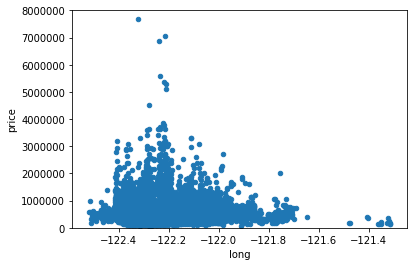

In [21]:
# 위도 & 경도에 따른 가격의 상관계수
var = "long"
data = pd.concat([df_train['price'], df_train[var]], axis = 1)
data.plot.scatter(x=var, y='price', ylim=(0,8000000))

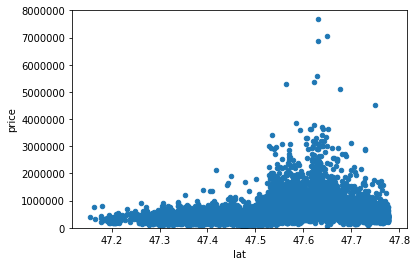

In [22]:
# 위도 & 경도에 따른 가격의 상관계수
var = "lat"
data = pd.concat([df_train['price'], df_train[var]], axis = 1)
data.plot.scatter(x=var, y='price', ylim=(0,8000000))

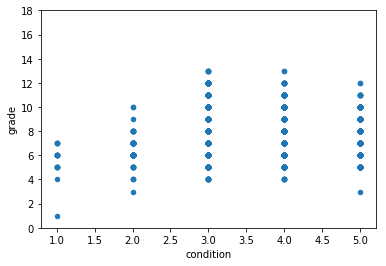

In [23]:
# conditon & grade에 따른 가격의 상관계수
var = "condition"
data = pd.concat([df_train['grade'], df_train[var]], axis = 1)
data.plot.scatter(x=var, y='grade', ylim=(0,18))

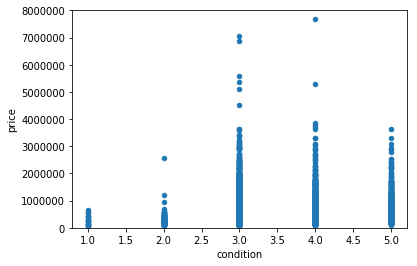

In [24]:
# conditon & grade에 따른 가격의 상관계수
var = "condition"
data = pd.concat([df_train['price'], df_train[var]], axis = 1)
data.plot.scatter(x=var, y='price', ylim=(0,8000000))

In [25]:
# 위도, 경도 이용해서 집값 분포 알아보기

In [26]:
sample = df_train[["lat","long"]]

In [27]:
# lat, long using

# creating a geometry column 
geometry = [Point(xy) for xy in zip(sample['lat'], sample['long'])]

# Coordinate reference system : WGS84
crs = {'init': 'epsg:4326'}

# Creating a Geographic data frame 
gdf = gpd.GeoDataFrame(sample, crs=crs, geometry=geometry)

In [28]:
gdf.head()

,lat,long,geometry
0,47.5112,-122.257,POINT (47.5112 -122.257)
1,47.7379,-122.233,POINT (47.7379 -122.233)
2,47.6168,-122.045,POINT (47.6168 -122.045)
3,47.3097,-122.327,POINT (47.3097 -122.327)
4,47.4095,-122.315,POINT (47.4095 -122.315)


In [29]:
gdf.columns

Index(['lat', 'long', 'geometry'], dtype='object')

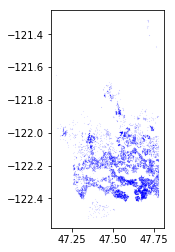

In [30]:
# Plot all points
gdf.plot(marker='o', color='b', markersize=0.001)